Step 1: Setting Up the Environment

First, ensure you have the required libraries installed:

In [8]:
# !pip install tensorflow opencv-python-headless numpy matplotlib

Step 2: Importing Libraries

In [9]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

Step 3: Preparing the Dataset

For OCR, you can use the MNIST dataset for digit recognition. For more complex text, you might need a custom dataset.

In [10]:
mnist = tf.keras.datasets.mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Step 4: Building the Model

Create a Convolutional Neural Network (CNN) model for digit recognition.

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Step 5: Training the Model

Train the CNN model on the MNIST dataset.

In [19]:
# Set up callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
#early_stopping
#model_checkpoint

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    validation_split=0.2, 
    callbacks=[early_stopping, model_checkpoint]
)

# Save the final model
model.save('final_model.keras')

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9034 - loss: 0.3218 - val_accuracy: 0.9816 - val_loss: 0.0624
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.9838 - loss: 0.0498 - val_accuracy: 0.9877 - val_loss: 0.0454
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9896 - loss: 0.0321 - val_accuracy: 0.9877 - val_loss: 0.0381
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 17ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9885 - val_loss: 0.0372
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9947 - loss: 0.0154 - val_accuracy: 0.9881 - val_loss: 0.0416
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9896 - val_loss: 0.0384
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.9972 - loss: 0.0084 - val_accuracy: 0.9904 - val_loss: 0.0355
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9982 -

Step 6: Evaluating the Model

Evaluate the model to see its performance.

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9868 - loss: 0.0442
Accuracy: 0.9907000064849854


Also make a plot

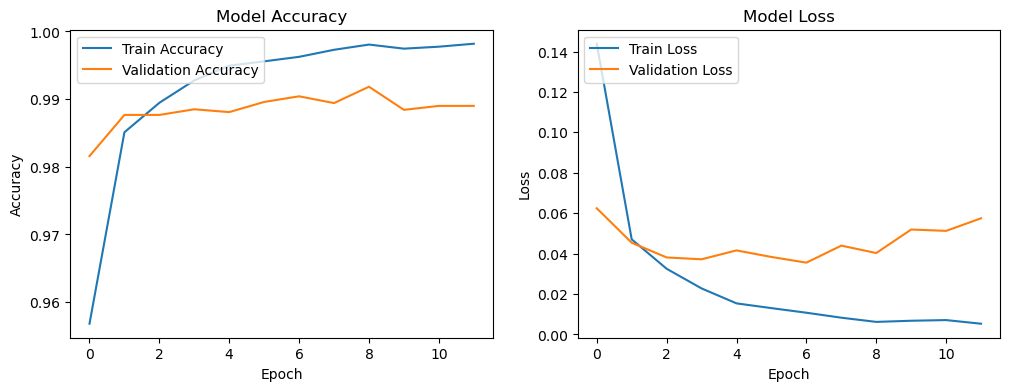

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

Step 7: Using the Model for Prediction

You can use the trained model to make predictions on new images.

In [22]:
# Load an image (example image path: 'digit.png')
image = cv2.imread('digit.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image / 255.0
image = image.reshape(-1, 28, 28, 1)

# Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted Class: {predicted_class[0]}')

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Step 8: Visualizing the Prediction

Display the input image and its predicted class.

In [ ]:
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_class[0]}')
plt.show()

Step 9: Integrating with PyQt6 (Optional)

If you want to integrate this OCR with a PyQt6 GUI, you can refer to the previous steps provided for setting up a PyQt6 application and adapting the prediction and visualization code accordingly.

This guide provides a basic framework for OCR using Keras, TensorFlow, and OpenCV. For more advanced topics such as handwriting recognition or using more complex datasets, you can look for specific tutorials and datasets that fit your needs.